In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-bright')
from collections import Counter
import pickle
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing

from IPython.display import display
%load_ext memory_profiler
%load_ext line_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
def train_test_split(dataX, datay, proportion_train = .75):
    train_cutoff = int(np.floor(proportion_train*len(dataX)))

    X_train = dataX[:train_cutoff]
    X_test  = dataX[train_cutoff:]

    y_train = datay[:train_cutoff]
    y_test  = datay[train_cutoff:]

    return X_train, y_train, X_test, y_test

def feature_target_split(df,feature_names, target_name):
    X_data = df[feature_names].as_matrix()
    y_data = df[target_name].as_matrix()
    return X_data, y_data

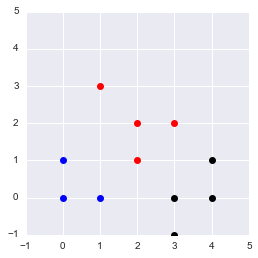

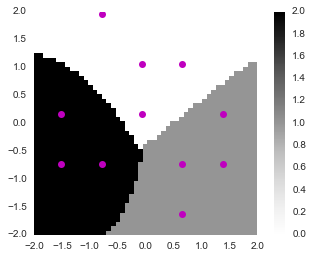

In [135]:
# effect of standardization / normalization to the decision boundary for LogisticRegression and SVM
np.random.seed(0)

# adjust these
scale_fac = 1
tranlation_fac = 0

x0 = np.array([1,2,2,3])*scale_fac + tranlation_fac
y0 = np.array([3,1,2,2]).astype(float)
df1 = pd.DataFrame({'x':x0, 'y':y0, 'label':0})

x1 = np.array([3,4,3,4])*scale_fac + tranlation_fac
y1 = np.array([0,0,-1,1]).astype(float)
df2 = pd.DataFrame({'x':x1, 'y':y1, 'label':1})

x2 = np.array([0,1,0])*scale_fac + tranlation_fac
y2 = np.array([0,0,1]).astype(float)
df3 = pd.DataFrame({'x':x2, 'y':y2, 'label':2})

df = pd.concat([df1,df2,df3])
######
X_data, y_data = feature_target_split(df,['x','y'],'label')

scaler = preprocessing.StandardScaler().fit(X_data)

# model = linear_model.LogisticRegression()
# model = svm.LinearSVC()
model = svm.SVC()

# correct version:
model.fit(scaler.transform(X_data),y_data)

# # incorrect version:
# model.fit(X_data,y_data)
# coef_ = model.coef_
# intercept_ = model.intercept_

plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'ko')
plt.plot(x2,y2,'bo')

xx = np.linspace(-10,60)
yy = m * xx + c

plt.plot(xx, yy, 'b-')
plt.xlim(-1 + tranlation_fac, 5*scale_fac + tranlation_fac)
plt.ylim(-1, 5)

plt.gca().set_aspect('equal', adjustable='box')

########################
# normalized form
plt.figure()
temp = scaler.transform(X_data)
plt.plot(temp[:,0], temp[:,1], 'mo')

plt.gca().set_aspect('equal', adjustable='box')

# class regions
nxxx, nyyy = (50, 50)
xxx = np.linspace(-2, 2, nxxx)
yyy = np.linspace(-2, 2, nyyy)
xxx_mesh, yyy_mesh = np.meshgrid(xxx, yyy)

result = np.zeros((nxxx, nyyy))
for i in range(len(xxx_mesh)):
    for j in range(len(yyy_mesh)):
        result[i][j] = model.predict([[xxx_mesh[i][j], yyy_mesh[i][j]]])[0]
plt.pcolor(xxx_mesh, yyy_mesh, result)
plt.colorbar()
########################


In [192]:
from sklearn import svm, grid_search, datasets

iris = datasets.load_iris()


parameters = {'C':np.logspace(-4, 4, 10)}

grid = grid_search.GridSearchCV(svm.LinearSVC(), parameters)


grid.fit(iris.data, iris.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   7.74264e-04,   5.99484e-03,   4.64159e-02,
         3.59381e-01,   2.78256e+00,   2.15443e+01,   1.66810e+02,
         1.29155e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [193]:
grid.predict([ 5.2,  3.4,  1.4,  0.2])

/Users/sidz/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [195]:
grid.best_estimator_.coef_


array([[ 0.24467024,  0.43738181, -0.90875681, -0.56240285],
       [ 0.01644724, -0.95023925,  0.45240627, -1.00519227],
       [-0.87812974, -1.10666829,  1.55494724,  2.25510032]])

<Container object of 2 artists>

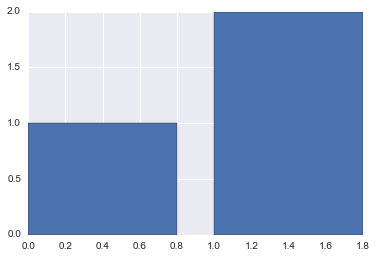

In [321]:
plt.bar(np.arange(len([1,2])),[1,2])

In [329]:
for i in range(0,110, 10):
    print i

0
10
20
30
40
50
60
70
80
90
100


In [341]:
q1=pd.DataFrame(data=[2,3,4], index=[1,2,3], columns=['sd'])
q2=pd.DataFrame()
pd.concat([q1,q2,q2])

,sd
1,2
2,3
3,4


In [357]:
all(isinstance(elem, list) for elem in [2,3])

False